SPOTid UCL and biomarker data

### Log

2017-10-09

- Labbook of current data for SPOTid to share with Manu/JP
- Full data prep set up and run locally
- UCL data including biomarker data then saved and exported here
- Using Jupyter notebook to share and communicate
- Expects to be running from within labbook directory

2017-10-11

- confirmed that I have no complement, cytokine or immunoglobulin data for haem-onc cohort

### Setup and load data
First load data

In [230]:
library(data.table)
library(readr)
library(ggplot2)
library(Hmisc)

In [233]:
setwd('~/projects/ac-analysis-spotid/src1')

In [234]:
suppressMessages(dt <- data.table(read_csv('data/raw/spotid_ucl.csv')))

Warning message:
“Missing column names filled in: 'X1' [1]”

- Now inspect `str`ucture of the data; should be around 16k rows and 114 vars
- Note that each patient record is built creating an empty skeleton of 4 hour timeblocks from day -2 to end of follow-up; where longitudinal data is recorded this is then populated in the appropriate time slot;
- Most longitudinal data has been forward filled (last one carried forward); the original data is available as the same variable but with the `_var` suffix

In [235]:
# suppressWarnings(str(dt))
names(dt)
dim(dt)

[1] "X1"               "avpu"             "avpu_orig"       
  [4] "bili"             "bili_orig"        "bpdia"           
  [7] "bpdia_orig"       "bpsys"            "bpsys_orig"      
 [10] "c3a"              "c5a"              "cortisol"        
 [13] "creatinine"       "creatinine_orig"  "fio2"            
 [16] "fio2_orig"        "fio2_pct"         "fio2u"           
 [19] "fio2u_orig"       "ft3"              "ft4"             
 [22] "gcst"             "gcst_orig"        "hrate"           
 [25] "hrate_orig"       "id_x"             "ifn"             
 [28] "iga"              "igg"              "igkf"            
 [31] "iglf"             "igm"              "il17a"           
 [34] "il2"              "il4"              "il6"             
 [37] "pao2"             "pao2_orig"        "pf"              
 [40] "platelets"        "platelets_orig"   "rrate"           
 [43] "rrate_orig"       "rxcvs_dose"       "rxcvs_dose_orig" 
 [46] "rxcvs_drug"       "rxcvs_drug_orig"  "rxfio2"          
 [49] "rxfio2_orig"      "rxplat"           "rxplat_orig"     
 [52] "rxrrt"            "rxrrt_orig"       "rxsed"           
 [55] "rxsed_orig"       "sdate"            "sf"              
 [58] "sitecode"         "smp_order"        "smpbuffy"        
 [61] "smpedta"          "smppax1"          "smppax2"         
 [64] "smpserum"         "sofa_c"           "sofa_h"          
 [67] "sofa_k"           "sofa_n"           "sofa_p"          
 [70] "sofa_r"           "spo2"             "spo2_orig"       
 [73] "spotidno"         "stime"            "stime_orig"      
 [76] "sx"               "temperature"      "temperature_orig"
 [79] "tnf"              "tsh"              "urine1"          
 [82] "urine1_orig"      "urine24"          "urine24_orig"    
 [85] "v_ccmds"          "v_ccmds_orig"     "v_loca"          
 [88] "v_loca_orig"      "age"              "protocol"        
 [91] "male"             "day.zero"         "date_trace"      
 [94] "dead"             "dead.time"        "fupend_why"      
 [97] "fupend_date"      "hadmit_date"      "hdc_date"        
[100] "hlos"             "hlos.pre"         "hlos.post"       
[103] "fup.days"         "dead.hosp"        "charlson"        
[106] "adl.sum"          "immune.flag"      "sepsis.source"   
[109] "creatinine.base"  "valid.all"        "ha_res"          
[112] "residence.pre"    "hdc_res"          "residence.post"

[1] 16610   114

Now check unique patients and basic data characteristics

In [237]:
'unique patients'
uniqueN(dt$spotidno) 
'all data from UCL?'
table(dt$sitecode) 
'prepare a table with 1 patient per row'
dt1 <- dt[,lapply(.SD,head,1),by=spotidno]
describe(dt1$age) # 2 patients missing age?
describe(dt1$male)

describe(dt1$protocol)
describe(dt1$dead)
with(dt1, table(dead,protocol)) # missingness in haemonc (see issue tracker)

[1] "unique patients"

[1] 184

[1] "all data from UCL?"


  ucl 
16610 

[1] "prepare a table with 1 patient per row"

dt1$age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     182        2      182        1     58.9     17.3    29.16    39.07 
     .25      .50      .75      .90      .95 
   49.35    59.71    67.83    79.61    82.97 

lowest : 18.49418 22.31622 23.41958 24.50376 25.59617
highest: 86.33539 89.57426 89.66461 89.95756 90.91581

dt1$male 
       n  missing distinct 
     184        0        2 
                      
Value      FALSE  TRUE
Frequency    109    75
Proportion 0.592 0.408

dt1$protocol 
       n  missing distinct 
     184        0        2 
                              
Value        haemonc pneumonia
Frequency         88        96
Proportion     0.478     0.522

dt1$dead 
       n  missing distinct     Info      Sum     Mean      Gmd 
     181        3        2     0.67       61    0.337   0.4494 


    protocol
dead haemonc pneumonia
   0      59        61
   1      29        32

Pneumonia patient biomarker inspection 

In [238]:
dtp <- dt[protocol == 'pneumonia']
dtp[, dead := factor(dead, levels=c(0,1), labels=c('survived', 'died'))]

In [239]:
dim(dtp)
table(dtp$dead)
describe(dtp$c3a)

[1] 8640  114


survived     died 
    5490     2880 

dtp$c3a 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     217     8423      193        1    100.4    55.27    46.92    51.62 
     .25      .50      .75      .90      .95 
   64.72    84.11   116.70   152.68   226.13 

lowest :  32.937  35.408  35.933  38.139  38.801
highest: 293.906 303.120 350.794 355.712 356.842

[1] "C3a"

Warning message:
“Removed 8157 rows containing non-finite values (stat_density).”

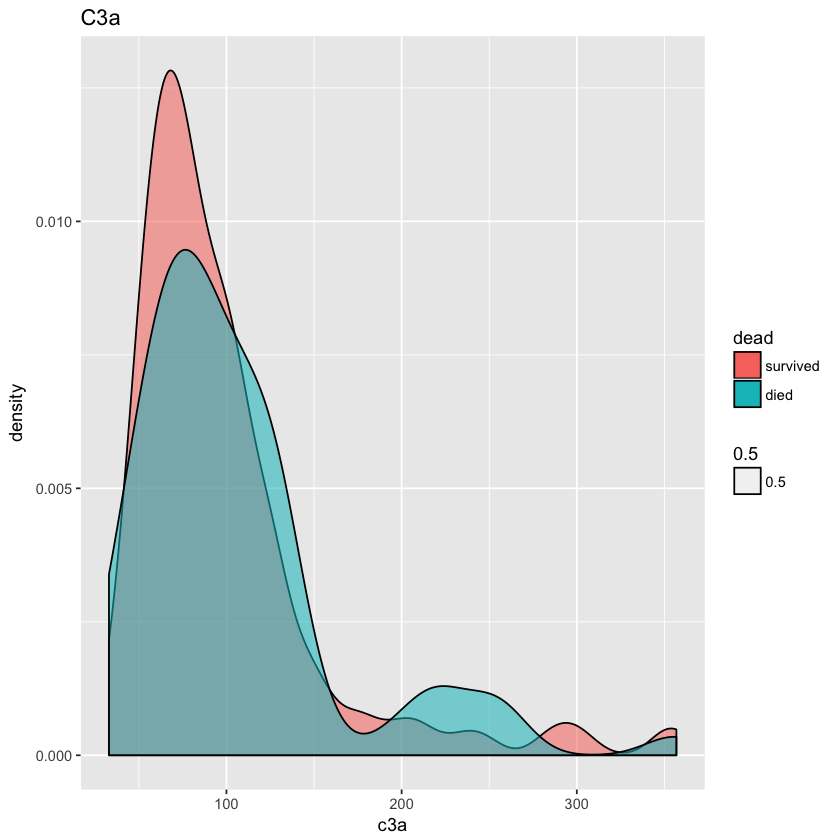

In [240]:
# Plot density by outcome
'C3a'
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=c3a, fill=dead, alpha=0.5)) + ggtitle('C3a')
gp + geom_density()

[1] "C3a"

Warning message:
“Removed 8157 rows containing non-finite values (stat_density).”

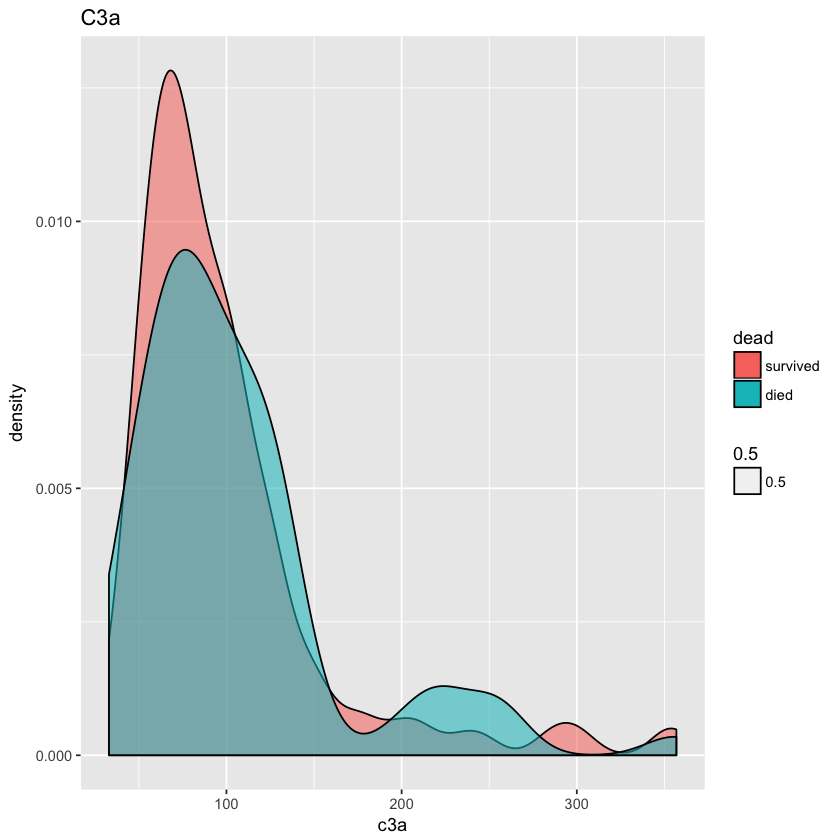

In [242]:
# Plot density by outcome
'C3a'
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=c3a, fill=dead, alpha=0.5)) + ggtitle('C3a')
gp + geom_density()

[1] "C5a"

Warning message:
“Removed 8157 rows containing non-finite values (stat_density).”

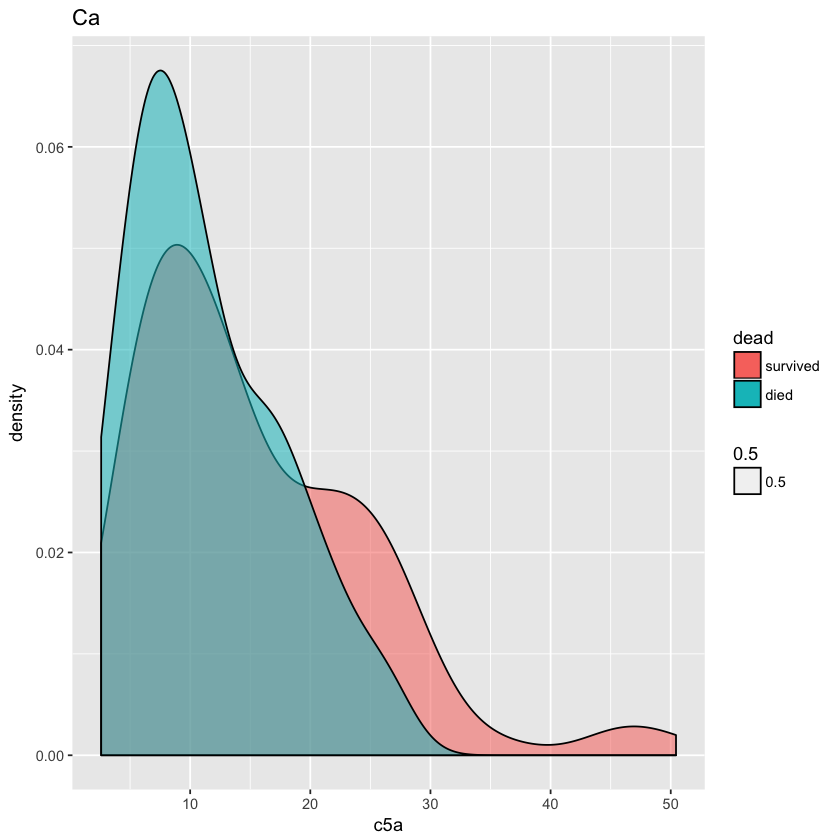

In [243]:
'C5a'
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=c5a, fill=dead, alpha=0.5)) + ggtitle('Ca')
gp + geom_density()

[1] "IL6"

Warning message:
“Removed 8167 rows containing non-finite values (stat_density).”

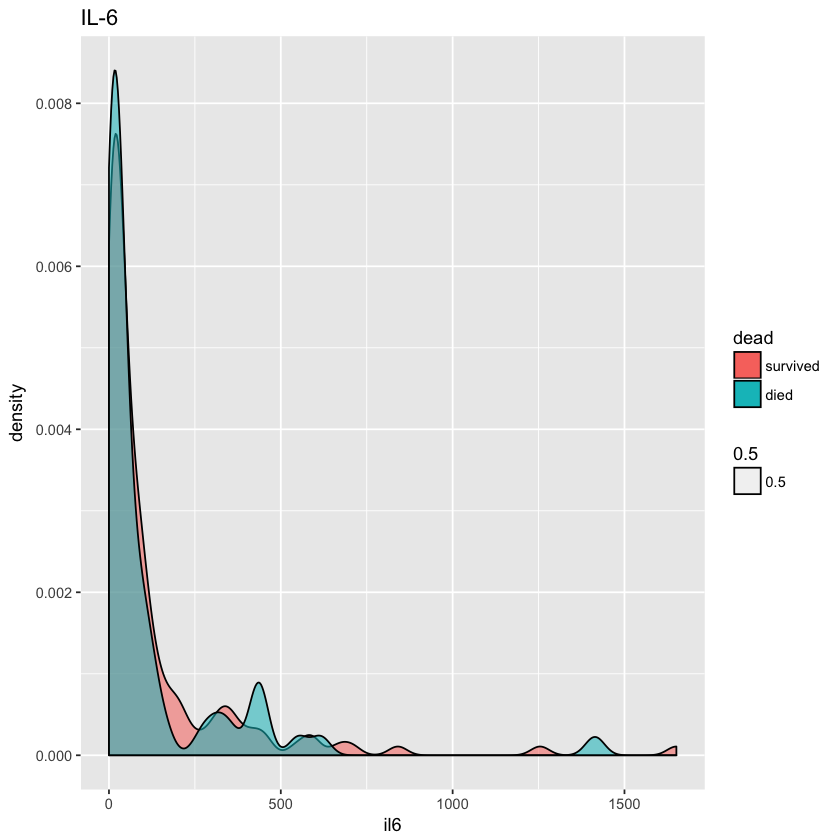

In [244]:
'IL6'
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=il6, fill=dead, alpha=0.5)) + ggtitle('IL-6')
gp + geom_density()

[1] "IgG"

Warning message:
“Removed 8243 rows containing non-finite values (stat_density).”

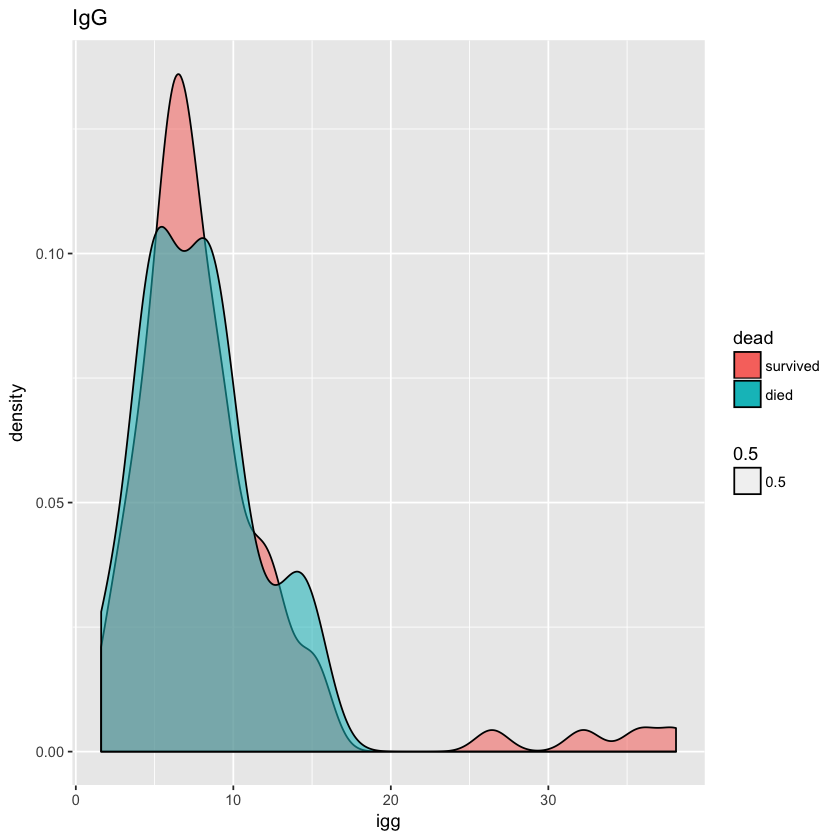

In [245]:
'IgG'
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=igg, fill=dead, alpha=0.5)) + ggtitle('IgG')
gp + geom_density()

Warning message:
“Removed 3577 rows containing non-finite values (stat_smooth).”

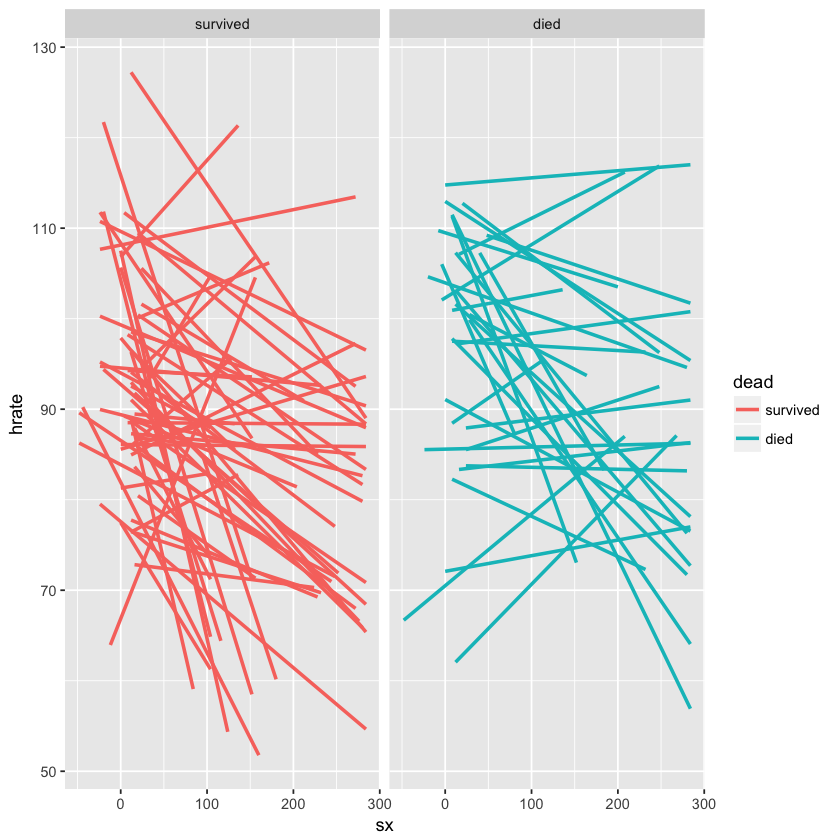

In [246]:
# Plot heart rate trajectories
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=sx,y=hrate,group=spotidno,colour=dead))
gp + geom_smooth(method='lm',se=FALSE) + facet_wrap(~dead)

Warning message:
“Removed 8157 rows containing non-finite values (stat_smooth).”

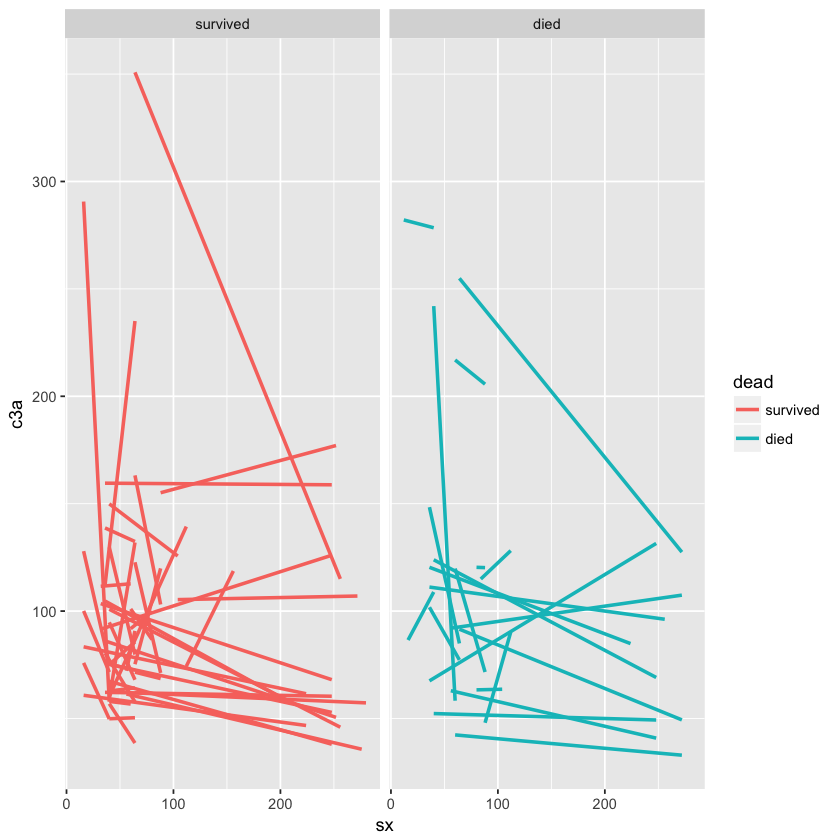

In [247]:
# Plot C3a trajectories
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=sx,y=c3a,group=spotidno,colour=dead))
gp + geom_smooth(method='lm',se=FALSE) + facet_wrap(~dead)

Warning message:
“Removed 8243 rows containing non-finite values (stat_smooth).”

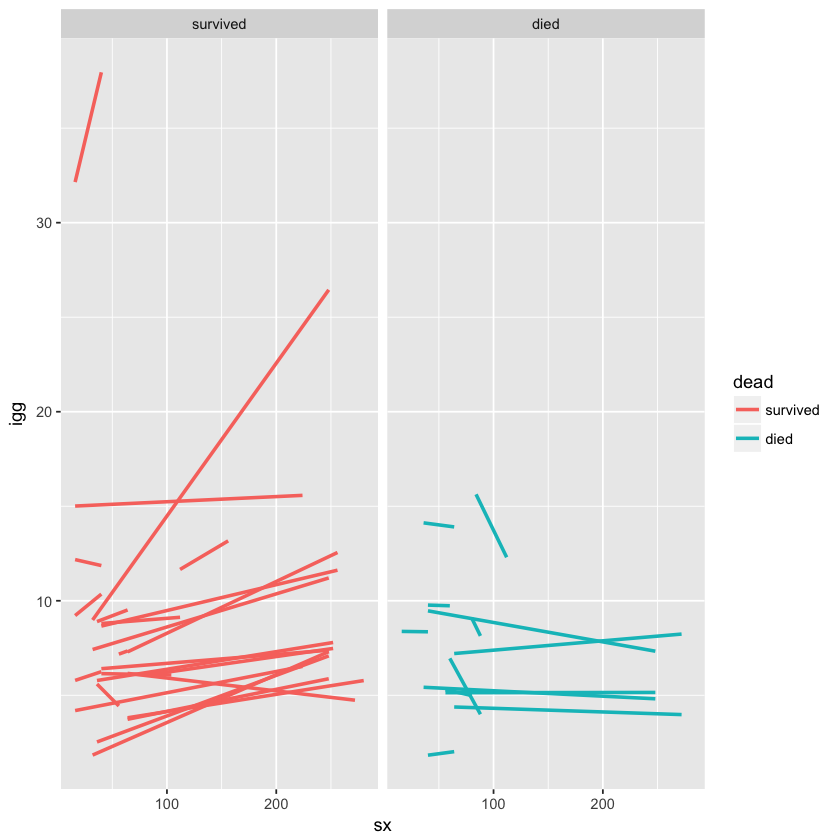

In [248]:
# Plot IgG trajectories
gp <- ggplot(data=dtp[!is.na(dead)], aes(x=sx,y=igg,group=spotidno,colour=dead))
gp + geom_smooth(method='lm',se=FALSE) + facet_wrap(~dead)